In [1]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
# Reading the data
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Display of Information 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Checking for Null Value

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
## There are no null values in the data

In [8]:
data['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
## There are no categorical variable to encode them

In [10]:
data.shape

(1025, 14)

In [11]:
data.size

14350

## Checking for duplicate values

In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(302, 14)

## Scale the continuous numerical values

In [15]:
# scaling 'age','trestbps','chol','thalach','oldpeak'
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
col=['age','trestbps','chol','thalach','oldpeak']
data[col]=st.fit_transform(data[col])

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [17]:
data.shape

(302, 14)

## Correlation of all features

In [18]:
cor_matrix=data.corr()

In [19]:
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

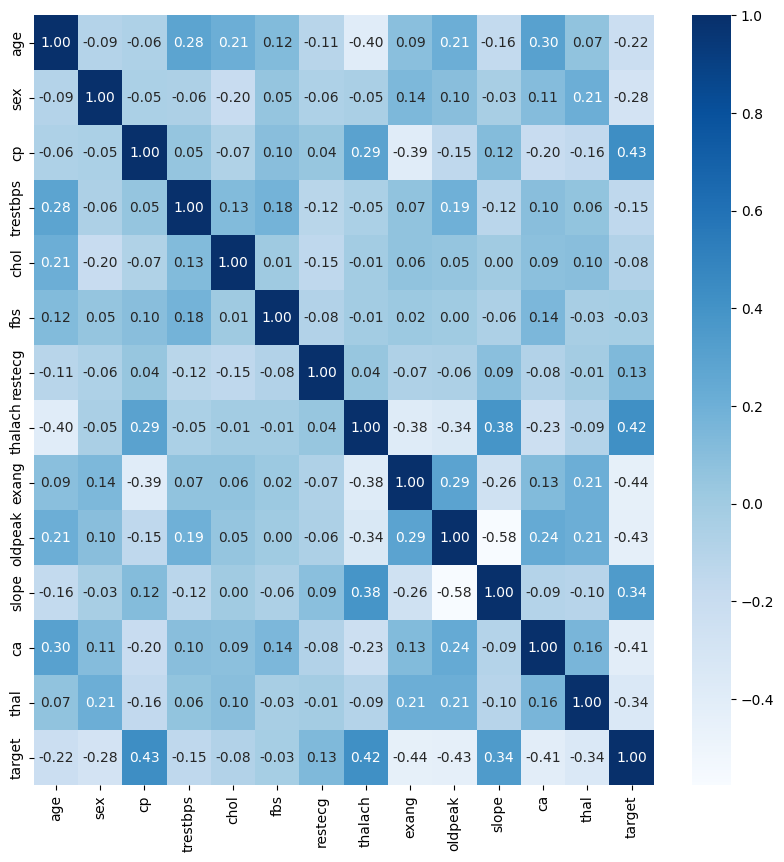

In [21]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix,cmap='Blues',fmt='.2f',annot=True)
plt.show()

## Visualization

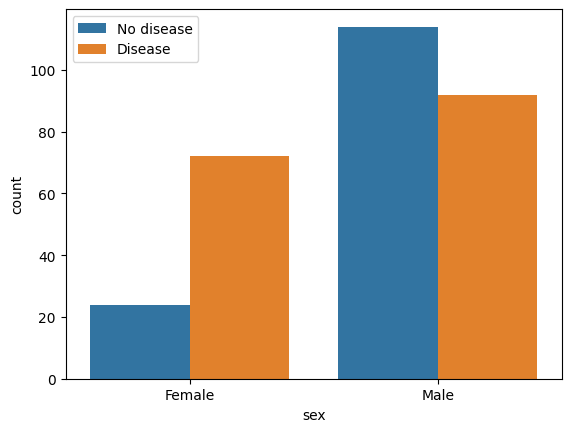

In [22]:
sns.countplot(x='sex',hue='target',data=data)
plt.legend(labels=['No disease','Disease'])
plt.xticks([0,1],['Female','Male'])
plt.show()

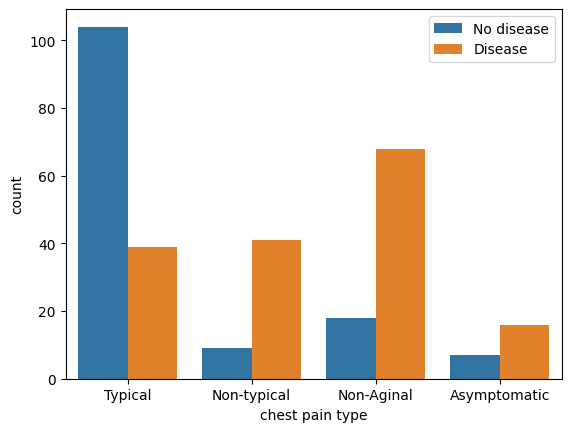

In [23]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No disease','Disease'])
plt.xticks([0,1,2,3],['Typical','Non-typical','Non-Aginal','Asymptomatic'])
plt.xlabel("chest pain type")
plt.show()

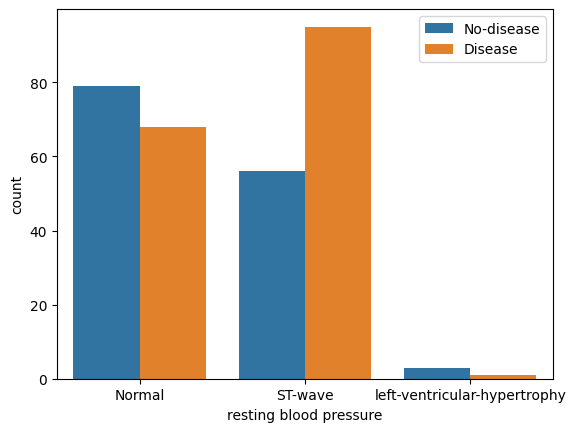

In [24]:
sns.countplot( x = 'restecg', hue = 'target',data =data)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1,2],['Normal','ST-wave','left-ventricular-hypertrophy'])
plt.xlabel("resting blood pressure")
plt.show()

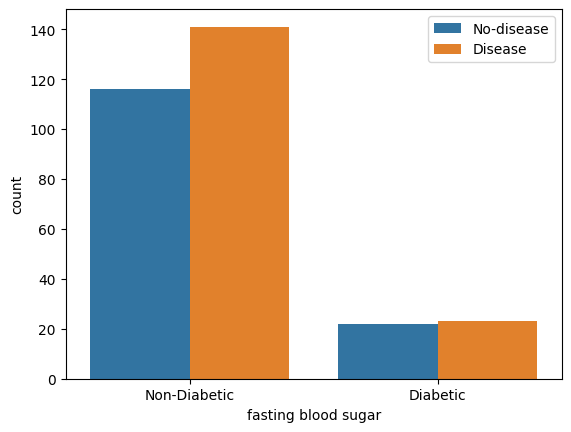

In [25]:
sns.countplot( x = 'fbs', hue = 'target',data =data)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1],['Non-Diabetic','Diabetic'])
plt.xlabel("fasting blood sugar")
plt.show()

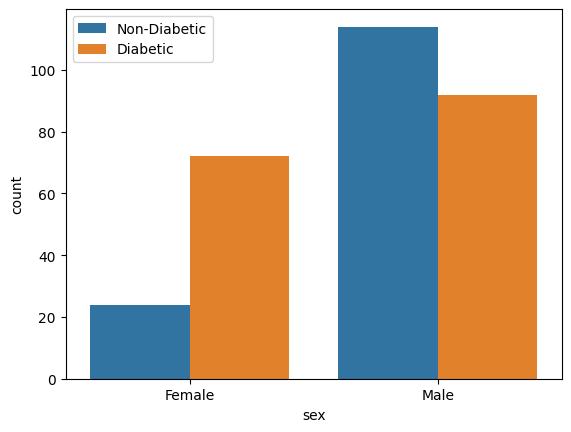

In [26]:
sns.countplot( x = 'sex', hue = 'target',data =data)
plt.legend(labels = ['Non-Diabetic','Diabetic'])
plt.xticks([0,1],['Female','Male'])
plt.show()

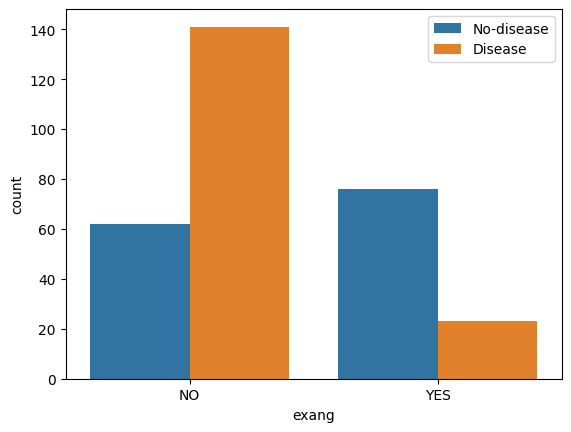

In [27]:
sns.countplot( x = 'exang', hue = 'target',data =data)
plt.legend(labels = ['No-disease','Disease'])
plt.xticks([0,1],['NO','YES'])
plt.show()

C:\Users\deshp\AppData\Local\Temp\ipykernel_30804\277487469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, bins = 10 , color = 'orange')


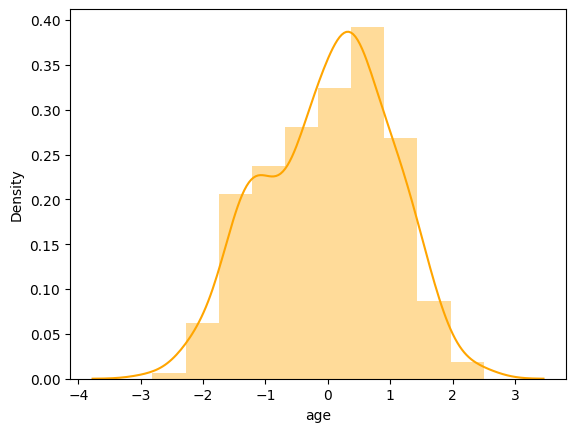

In [28]:
#to find the distribution of age within the dataset
sns.distplot(data.age, bins = 10 , color = 'orange')
plt.show()

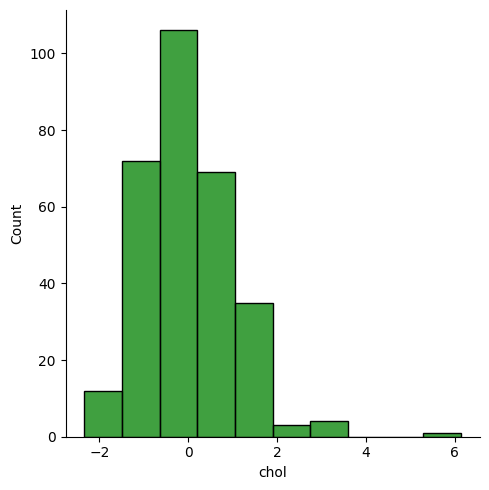

In [29]:
sns.displot(data.chol, bins = 10, color ="g")
plt.show()

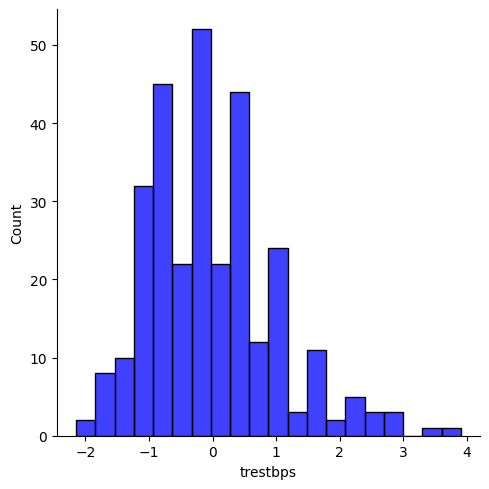

In [30]:
sns.displot(data.trestbps, bins = 20, color ="blue")
plt.show()

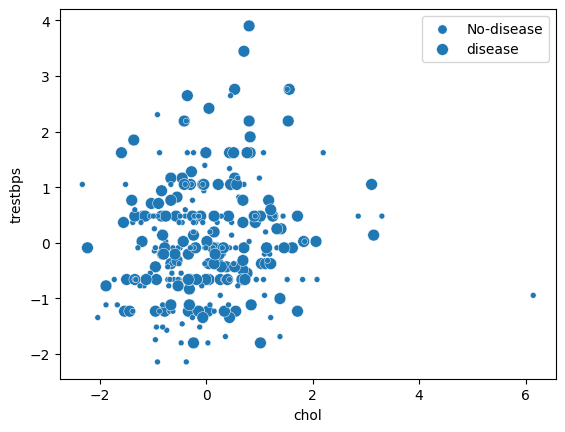

In [31]:
# to plot the continous varibles chol vs trestbps
sns.scatterplot(x = 'chol' , y = 'trestbps',data = data , size = "target")
plt.legend(labels = ['No-disease','disease'])
plt.show()

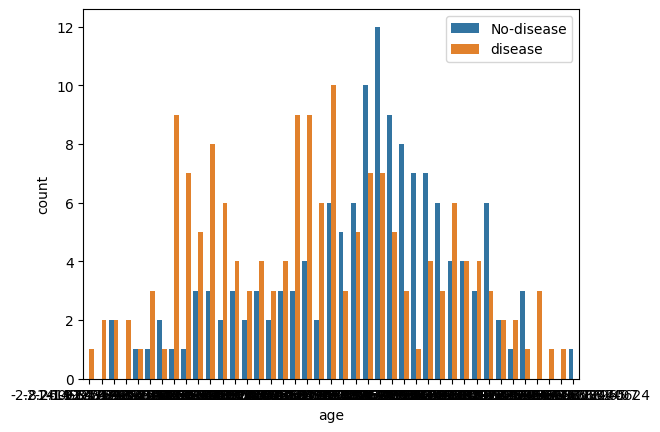

In [32]:

sns.countplot(x = 'age',data = data , hue = "target")
plt.legend(labels = ['No-disease','disease'])
plt.show()

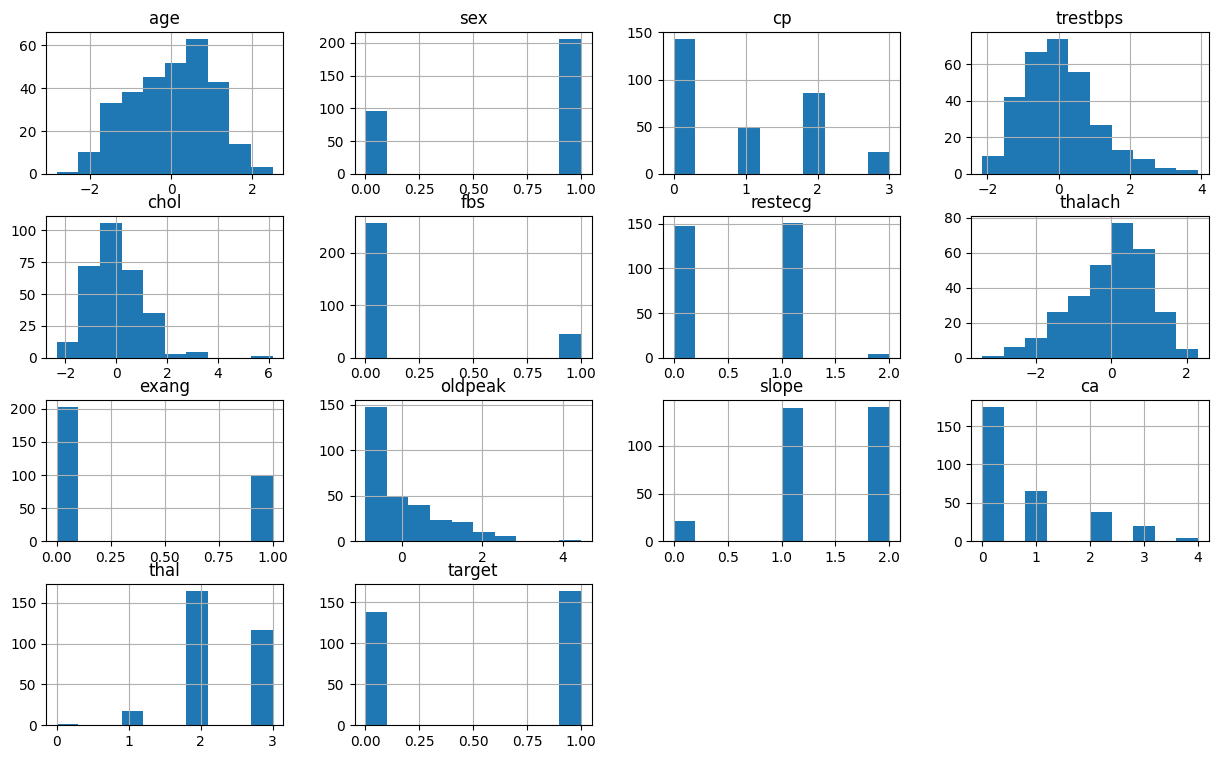

In [33]:
data.hist(figsize = (15,9))
plt.show()

## Model Training

In [34]:
# Dividing data into X and Y
X=data.drop('target',axis=1)
Y=data['target']

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,2,-0.661712,-0.687083,0,0,-1.511859,0,0.394086,1,0,2
733,-1.153610,0,2,-1.346085,-2.041893,0,1,1.112172,0,-0.382092,1,0,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
843,0.506972,1,3,1.619532,0.512893,0,0,-1.074521,0,-0.899544,2,0,2


In [36]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [37]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
# Models to implement
# 1. KNN
# 2. Naive Bayes
# 3. Decision Tree

## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# to decide number of neighbours
import math
n=round(math.sqrt(data.shape[0]))
print(n)

17


In [41]:
knn_model=KNeighborsClassifier(17)
knn_model.fit(x_train,y_train)
knn_y_pred=knn_model.predict(x_test)
knn_y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [42]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score,roc_auc_score

In [43]:
knn_accuracy=accuracy_score(y_test,knn_y_pred)
knn_precision=precision_score(y_test,knn_y_pred)
knn_recall=recall_score(y_test,knn_y_pred)
knn_f1=f1_score(y_test,knn_y_pred)

In [44]:
print("<----KNN model---->")
print(f'''Accuracy:{knn_accuracy}\n
Precision:{knn_precision}\n
Recall:{knn_recall}\n
F1-Score:{knn_f1}''')

<----KNN model---->
Accuracy:0.8524590163934426

Precision:0.813953488372093

Recall:0.9722222222222222

F1-Score:0.8860759493670886


In [45]:
confusion_matrix(y_test,knn_y_pred)

array([[17,  8],
       [ 1, 35]])

In [46]:
roc_score=roc_auc_score(y_test,knn_y_pred)
print(f"ROC-AUC:{roc_score}")

ROC-AUC:0.8261111111111111


In [47]:
knn_train_accuracy=knn_model.score(x_train,y_train)
knn_test_accuracy=knn_model.score(x_test,y_test)
print(f"train accuracy:{knn_train_accuracy}")
print(f"test accuracy:{knn_test_accuracy}")

train accuracy:0.8215767634854771
test accuracy:0.8524590163934426


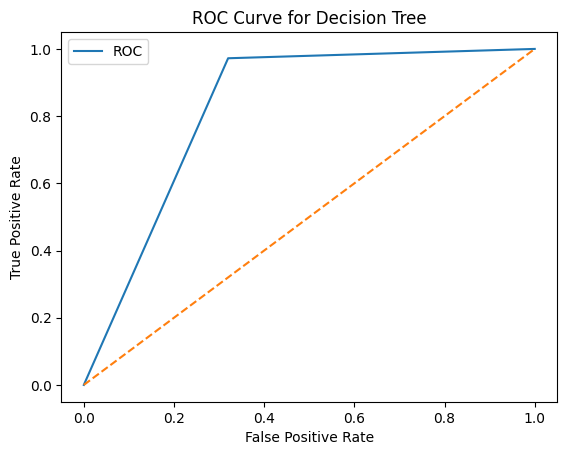

In [48]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,knn_y_pred)
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve for Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [49]:
# Here there is no big difference between training and test accuracy Hence There is no overfitting

## NAIVE BAYES

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [51]:
naive_model=GaussianNB()

In [52]:
parameters={
    'var_smoothing':[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
}

In [53]:
clf=GridSearchCV(naive_model,parameters,scoring='accuracy')

In [54]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             scoring='accuracy')

In [55]:
print(clf.best_params_)
print(clf.best_score_)

{'var_smoothing': 0.001}
0.8301870748299318


In [56]:
naive_model=GaussianNB(var_smoothing=0.001)

In [57]:
naive_model.fit(x_train,y_train)

GaussianNB(var_smoothing=0.001)

In [58]:
pred_train=naive_model.predict(x_train)
naive_train_accuracy=accuracy_score(y_train,pred_train)
print(f"Training Accuracy:{naive_train_accuracy}")

Training Accuracy:0.8298755186721992


In [59]:
pred_test=naive_model.predict(x_test)
naive_test_accuracy=accuracy_score(y_test,pred_test)
print(f"Testing Accuracy:{naive_test_accuracy}")

Testing Accuracy:0.8032786885245902


In [60]:
naive_accuracy=accuracy_score(y_test,pred_test)
naive_precision=precision_score(y_test,pred_test)
naive_recall=recall_score(y_test,pred_test)
naive_f1=f1_score(y_test,pred_test)

In [61]:
print("<----Naive Bayes model---->")
print(f'''Accuracy:{naive_accuracy}\n
Precision:{naive_precision}\n
Recall:{naive_recall}\n
F1-Score:{naive_f1}''')

<----Naive Bayes model---->
Accuracy:0.8032786885245902

Precision:0.8529411764705882

Recall:0.8055555555555556

F1-Score:0.8285714285714286


In [62]:
confusion_matrix(y_test,pred_test)

array([[20,  5],
       [ 7, 29]])

In [63]:
roc_score=roc_auc_score(y_test,pred_test)
print(f"ROC-AUC:{roc_score}")

ROC-AUC:0.8027777777777779


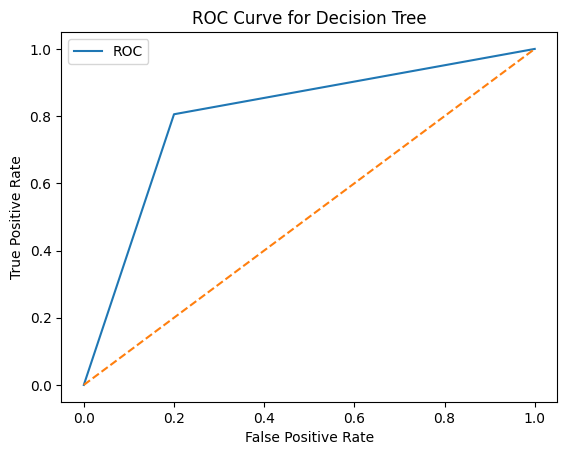

In [64]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,pred_test)
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve for Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [65]:
# Here there is no big difference between training and test accuracy Hence There is no overfitting

## Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model=DecisionTreeClassifier()

In [68]:
parameters1=[{'max_depth':list(range(1,15)),'max_features':list(range(1,14))}]

In [69]:
clf1=GridSearchCV(dt_model,parameters1,cv=10,scoring='accuracy')

In [70]:
clf1.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [71]:
print(clf1.best_params_)
print(clf1.best_score_)

{'max_depth': 3, 'max_features': 3}
0.7803333333333333


In [72]:
dt_model=DecisionTreeClassifier(max_depth=3,max_features=3)

In [73]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3)

In [74]:
dt_train_pred=dt_model.predict(x_train)
dt_train_accuracy=accuracy_score(y_train,dt_train_pred)
print(f"Training Accuracy:{dt_train_accuracy}")

Training Accuracy:0.7842323651452282


In [75]:
dt_test_pred=dt_model.predict(x_test)
dt_test_accuracy=accuracy_score(y_test,dt_test_pred)
print(f"Testing Accuracy:{dt_test_accuracy}")

Testing Accuracy:0.7213114754098361


In [76]:
dt_accuracy=accuracy_score(y_test,dt_test_pred)
dt_precision=precision_score(y_test,dt_test_pred)
dt_recall=recall_score(y_test,dt_test_pred)
dt_f1=f1_score(y_test,dt_test_pred)

In [77]:
print("<----Decision Tree model---->")
print(f'''Accuracy:{dt_accuracy}\n
Precision:{dt_precision}\n
Recall:{dt_recall}\n
F1-Score:{dt_f1}''')

<----Decision Tree model---->
Accuracy:0.7213114754098361

Precision:0.7714285714285715

Recall:0.75

F1-Score:0.7605633802816901


In [78]:
confusion_matrix(y_test,dt_test_pred)

array([[17,  8],
       [ 9, 27]])

In [79]:
roc_score=roc_auc_score(y_test,dt_test_pred)
print(f"ROC-AUC:{roc_score}")

ROC-AUC:0.715


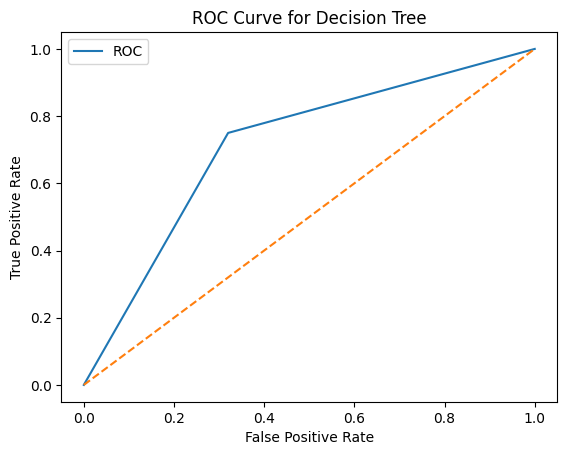

In [80]:
from sklearn.metrics import roc_curve
fpr,tpr,_=roc_curve(y_test,dt_test_pred)
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve for Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Comparision of Accuracy of all models

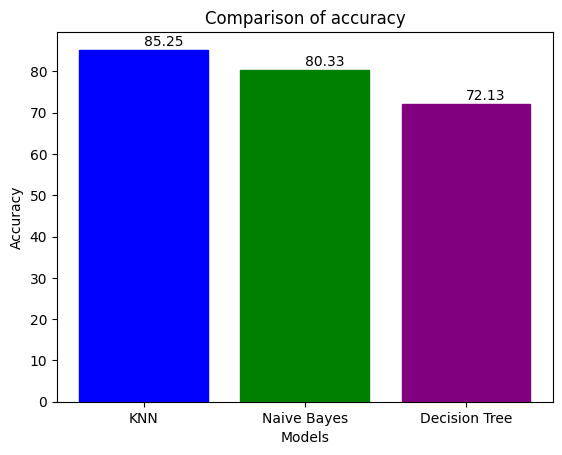

In [81]:
accuracy=[round(knn_accuracy*100,2),round(naive_accuracy*100,2),round(dt_accuracy*100,2)]
models=['KNN','Naive Bayes','Decision Tree']
bars=plt.bar(models,accuracy)
bars[0].set_color("blue")
bars[1].set_color("green")
bars[2].set_color("purple")
for i in range(len(models)):
    plt.text(i,accuracy[i]+1,accuracy[i])
    
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of accuracy")
plt.show()